## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer here
#################################

$b=b-\alpha\dfrac{1}{M}\Big[\sum\limits_{i=1}^M(y^i=k \&\& y^i_{pred}\neq y^i)\cdot1+\sum\limits_{j=1}^M(y^j\neq k\&\&y^i_{pred}=k)\cdot1\Big] $  

$W_k=W_k-\alpha\dfrac{1}{M}\Big[\sum\limits_{i=1}^M(y^i=k \&\& y^i_{pred}\neq y^i)x^i+
\sum\limits_{j=1}^M(y^j\neq k\&\&y^i_{pred}=k)x^j\Big]$   

for all $x^i(i \in (1, M))$ where $k={0,1,2}$ and $\alpha$ is learning rate                            
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
%matplotlib inline
np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_test.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45,)
<class 'numpy.ndarray'>


In [4]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        # choose Gaussian distribution with (0,1e-4)
        weight = 1e-2*np.random.randn(weight_dimension[0],weight_dimension[1]) + 0
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normalize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        # training process
        dW = np.zeros(self.weight.shape)
                
        num_train = X_train.shape[0]
        num_class = self.weight.shape[1]
        for i in range(num_train):
            
            score = X_train[i].dot(self.weight)
            correct_class_score = score[y_train[i]]
            for j in range(num_class):
                if j == y_train[i]:
                    continue
                # add penalty on wrong labels for this datapoint and for other labels
                if score[j]>correct_class_score:
                    dW[:, j] += X_train[i]
                    dW[:, y_train[i]] -= X_train[i]
                
        
        # update weight  
        dW /= num_train
        self.weight -= self.lr*dW             
        scores = X_train.dot(self.weight)
        # predict the training label
        y_train_pre = np.argmax(scores, axis = 1)
        train_acc = np.mean(y_train_pre == y_train)
        
        
        return train_acc
        
    def test_step(self, X_test, y_test):
    
        
        
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        
        y_test_pre = np.argmax(X_test.dot(self.weight), axis = 1)
        test_acc = np.mean(y_test_pre == y_test)
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        self.X_test = self.data_preprocessing(data=self.X_test)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        # add bias so that only W=[W,b] is considered
        self.X_train = np.hstack([self.X_train, np.ones((self.X_train.shape[0], 1))])
        self.X_test = np.hstack([self.X_test, np.ones((self.X_test.shape[0], 1))])
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            #print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

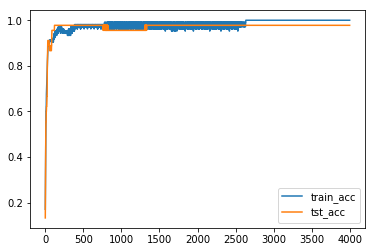

In [7]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

#from Perceptron_Learning_Algorithm import MultiClsPLA

lr = 1e-3
num_epoch=4000
num_cls = len(np.unique(y))
weight_dim0 = X_train.shape[1]+1
weight_dimension = (weight_dim0, num_cls)
MPLA = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)

MPLA.train()

MPLA.vis_acc_curve()